In [98]:
import nltk
import glob
import csv
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from string import punctuation
stopwords = stopwords.words('english')
from nltk import word_tokenize
import math

In [85]:
files = pd.read_csv('..\csv\\filenameinfo.csv')

In [1]:
sentiment_dict = {}
for line in open('AFINN-111.txt') :
    word, score = line.split('\t')
    sentiment_dict[word] = int(score)


In [49]:
from bs4 import BeautifulSoup
with open("..\Data\\11253.male.26.Technology.Aquarius.xml", 'r') as f :
    soup = BeautifulSoup(f, "xml")
    posts = soup.find_all('post')
    
posts = [post.get_text() for post in posts]


for post in posts :
    print(analyze(post))

[2.261904761904762, -0.38095238095238093]
[2.5, 0.0]
[0, 0]
[1.2962962962962963, -0.7407407407407407]
[1.0, 0.0]
[1.75, -0.55]
[1.0, -1.25]


In [101]:
def analyzeBlog(filename) :
    try :
        with open(filename, 'r') as f :
            soup = BeautifulSoup(f, "xml")
            posts = soup.find_all('post')
    except :
        print(filename)
        return np.NaN
    
    posts = [post.get_text() for post in posts]
    return [analyze(post) for post in posts]

def score(sent) :
    pos = 0
    neg = 0
    count = 0
    for word in word_tokenize(sent) :
        score = sentiment_dict.get(word,0)
        if score > 0 :
            pos += score
            count += 1
        elif score < 0 :
            neg += score
            count += 1
    if count == 0 :
        return [0,0]
    else :
        return [pos/count,neg/count]

def analyze(post) :
    scores = []
    for sent in sent_tokenize(post) :
        scores.append(score(sent))
    return overall(scores)
    
def overall(scores) :
    pos = 0
    neg = 0
    count = 0
    for score in scores :
        if (score[0] != 0 or score[1] != 0) :
            count += 1
        pos += score[0]
        neg += score[1]
    if count == 0 :
        return [0,0]
    return [pos/count,neg/count]

def average(scores) :
    pos = 0
    neg = 0
    if not isinstance(scores,list) :
        return None
    for score in scores :
        pos += score[0]
        neg += score[1]
    return[pos/len(scores),neg/len(scores)]

def getBlogScore(row) :
    return analyzeBlog(row['filename'])

In [36]:
average(analyzeBlog("..\\Data\\3393498.female.17.Arts.Libra.xml"))

[0.49911111111111117, -0.5310555555555555]

In [87]:
files['post_scores'] = files.apply(lambda row: getBlogScore(row),axis=1)

..\Data\1005545.male.25.Engineering.Sagittarius.xml
..\Data\100812.female.26.Architecture.Aries.xml
..\Data\1011289.female.25.indUnk.Libra.xml
..\Data\1015252.female.23.indUnk.Pisces.xml
..\Data\1019224.female.27.RealEstate.Libra.xml
..\Data\1021779.female.25.indUnk.Scorpio.xml
..\Data\1022086.female.17.Student.Cancer.xml
..\Data\1028257.male.26.Education.Aries.xml
..\Data\1032153.male.27.Technology.Pisces.xml
..\Data\1043329.male.23.Government.Pisces.xml
..\Data\1046946.female.25.Arts.Virgo.xml
..\Data\1052611.male.23.Student.Aries.xml
..\Data\1054833.female.24.indUnk.Scorpio.xml
..\Data\1057539.female.33.Telecommunications.Pisces.xml
..\Data\1067319.male.26.Non-Profit.Aries.xml
..\Data\1070326.male.24.Government.Aquarius.xml
..\Data\1073035.female.45.Education.Cancer.xml
..\Data\1091067.male.24.Technology.Cancer.xml
..\Data\1103084.male.34.Education.Pisces.xml
..\Data\1110391.male.27.Law.Cancer.xml
..\Data\1119650.female.23.Student.Cancer.xml
..\Data\1125433.male.48.Military.Aquarius

In [103]:
def getPos(score):
    if not isinstance(score,list) :
        return np.NaN
    else :
        return score[0]

def getNeg(score) : 
    if not isinstance(score,list) :
        return np.NaN
    else :
        return score[1]

In [136]:
files.head()

,id,sex,age,topic,sign,filename,post_scores,avg_scores,avg_pos,avg_neg
0,1000331,female,37,indUnk,Leo,..\Data\1000331.female.37.indUnk.Leo.xml,"[[2.0, 0.0], [0.3333333333333333, -0.666666666...","[1.8685897435897436, -0.3579059829059829]",1.868590,-0.357906
1,1000866,female,17,Student,Libra,..\Data\1000866.female.17.Student.Libra.xml,"[[1.3125, -0.4375], [2.0, -0.375], [1.09009009...","[1.4288289906354912, -0.6695573069779681]",1.428829,-0.669557
2,1004904,male,23,Arts,Capricorn,..\Data\1004904.male.23.Arts.Capricorn.xml,"[[0.6, -1.0], [0.8333333333333334, -1.5], [0.6...","[0.8691746821554514, -0.6464180317545701]",0.869175,-0.646418
3,1005076,female,25,Arts,Cancer,..\Data\1005076.female.25.Arts.Cancer.xml,"[[0.0, -2.75], [1.6666666666666667, 0.0], [0.8...","[1.1070666044195452, -1.0506512605042013]",1.107067,-1.050651
4,1005545,male,25,Engineering,Sagittarius,..\Data\1005545.male.25.Engineering.Sagittariu...,NaN,None,NaN,NaN


In [104]:
files['avg_scores'] = files.apply(lambda row: average(row['post_scores']),axis=1)
files['avg_pos'] = files.apply(lambda row: getPos(row['avg_scores']),axis=1)
files['avg_neg'] = files.apply(lambda row: getNeg(row['avg_scores']),axis=1)

In [150]:
files.head()

,id,sex,age,topic,sign,filename,post_scores,avg_scores,avg_pos,avg_neg
0,1000331,female,37,indUnk,Leo,..\Data\1000331.female.37.indUnk.Leo.xml,"[[2.0, 0.0], [0.3333333333333333, -0.666666666...","[1.8685897435897436, -0.3579059829059829]",1.868590,-0.357906
1,1000866,female,17,Student,Libra,..\Data\1000866.female.17.Student.Libra.xml,"[[1.3125, -0.4375], [2.0, -0.375], [1.09009009...","[1.4288289906354912, -0.6695573069779681]",1.428829,-0.669557
2,1004904,male,23,Arts,Capricorn,..\Data\1004904.male.23.Arts.Capricorn.xml,"[[0.6, -1.0], [0.8333333333333334, -1.5], [0.6...","[0.8691746821554514, -0.6464180317545701]",0.869175,-0.646418
3,1005076,female,25,Arts,Cancer,..\Data\1005076.female.25.Arts.Cancer.xml,"[[0.0, -2.75], [1.6666666666666667, 0.0], [0.8...","[1.1070666044195452, -1.0506512605042013]",1.107067,-1.050651
4,1005545,male,25,Engineering,Sagittarius,..\Data\1005545.male.25.Engineering.Sagittariu...,NaN,None,NaN,NaN


In [154]:
files.to_csv("..\\csv\\sentiment.csv", sep=';')

In [173]:
files[['topic','sex','avg_pos','avg_neg']].groupby(['topic','sex']).describe().unstack()

avg_neg                                          \
                              count      mean       std       min       25%   
topic                sex                                                      
Accounting           female    66.0 -0.728776  0.256981 -1.270386 -0.905791   
                     male      26.0 -0.564348  0.260022 -1.055903 -0.737288   
Advertising          female    59.0 -0.786919  0.302280 -1.509818 -1.014323   
                     male      46.0 -0.723856  0.419000 -1.933333 -0.906186   
Agriculture          female    18.0 -0.694993  0.370548 -1.544643 -0.825696   
                     male      16.0 -0.942506  0.439892 -1.750265 -1.068254   
Architecture         female    26.0 -0.647771  0.320592 -1.787698 -0.721348   
                     male      29.0 -0.597036  0.298557 -1.404503 -0.834587   
Arts                 female   334.0 -0.769627  0.341296 -2.400171 -0.955254   
                     male     232.0 -0.743116  0.339277 -1.964947 -0.902482   
Automotive           female    14.0 -0.887161  0.439838 -1.696672 -1.128652   
                     male      35.0 -0.764059  0.288228 -1.516550 -0.936391   
Banking              female    35.0 -0.776967  0.271178 -1.413636 -0.973594   
                     male      57.0 -0.666936  0.294125 -1.451938 -0.854856   
Biotech              female    18.0 -0.775400  0.357662 -1.500000 -0.951064   
                     male      35.0 -0.803808  0.355948 -1.563131 -0.996920   
BusinessServices     female    70.0 -0.708870  0.321066 -2.103571 -0.930978   
                     male      70.0 -0.681788  0.325404 -1.467949 -0.863757   
Chemicals            female    19.0 -0.790640  0.326271 -1.592416 -0.920089   
                     male      32.0 -0.809069  0.360062 -1.885846 -1.043771   
Communications-Media female   161.0 -0.705082  0.301451 -2.179048 -0.891622   
                     male     191.0 -0.702980  0.315457 -2.226042 -0.890543   
Construction         female    17.0 -0.679520  0.192491 -1.007937 -0.816133   
                     male      27.0 -0.808804  0.586785 -2.895696 -1.001744   
Consulting           female    53.0 -0.662622  0.299884 -1.470370 -0.832584   
                     male      91.0 -0.658176  0.303510 -1.595595 -0.819036   
Education            female   466.0 -0.685755  0.311378 -1.976852 -0.880505   
                     male     314.0 -0.659395  0.316039 -1.805556 -0.846324   
Engineering          female    49.0 -0.624645  0.258290 -1.270433 -0.800947   
                     male     188.0 -0.603970  0.321312 -1.614645 -0.827657   
...                             ...       ...       ...       ...       ...   
Marketing            female    83.0 -0.636716  0.286570 -1.298148 -0.855931   
                     male      57.0 -0.609447  0.277525 -1.500079 -0.800000   
Military             female    30.0 -0.763648  0.307304 -1.315730 -1.009461   
                     male      72.0 -0.759155  0.273093 -1.624906 -0.929130   
Museums-Libraries    female    30.0 -0.584722  0.207197 -1.052497 -0.750781   
                     male      17.0 -0.617811  0.347298 -1.588462 -0.765625   
Non-Profit           female   164.0 -0.720937  0.285108 -1.310185 -0.942638   
                     male     138.0 -0.721053  0.321126 -2.267855 -0.904238   
Publishing           female    60.0 -0.748226  0.292791 -1.324167 -0.947826   
                     male      50.0 -0.731481  0.315202 -1.671875 -0.934826   
RealEstate           female    32.0 -0.803364  0.314548 -1.585159 -1.025398   
                     male      13.0 -0.814364  0.280730 -1.305556 -0.904912   
Religion             female    35.0 -0.710981  0.326858 -1.471520 -0.889798   
                     male      71.0 -0.577027  0.315030 -2.052222 -0.743314   
Science              female    73.0 -0.639682  0.319672 -1.576667 -0.806095   
                     male      84.0 -0.652981  0.337644 -1.924020 -0.747090   
Sports-Recreation    female    30.0 -0.600086  0.295010 -1.114480 -0.787498   

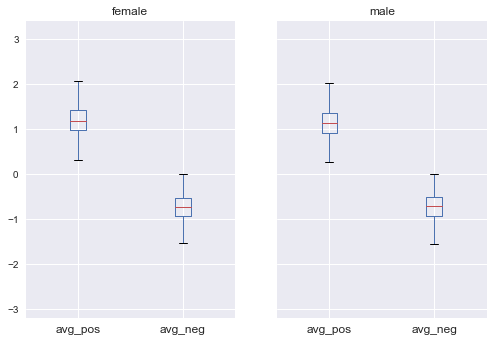

In [112]:
files[['sex','avg_pos','avg_neg']].groupby('sex').boxplot()
plt.show()

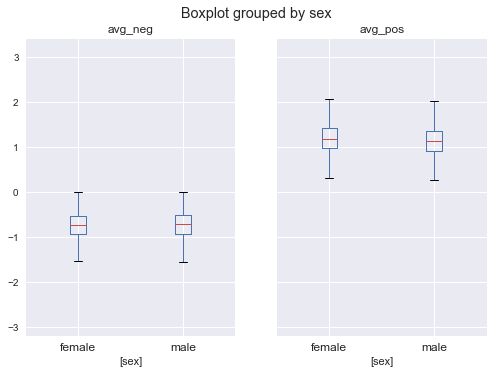

In [175]:
files[['sex','avg_pos','avg_neg']].boxplot(by='sex')
plt.show()

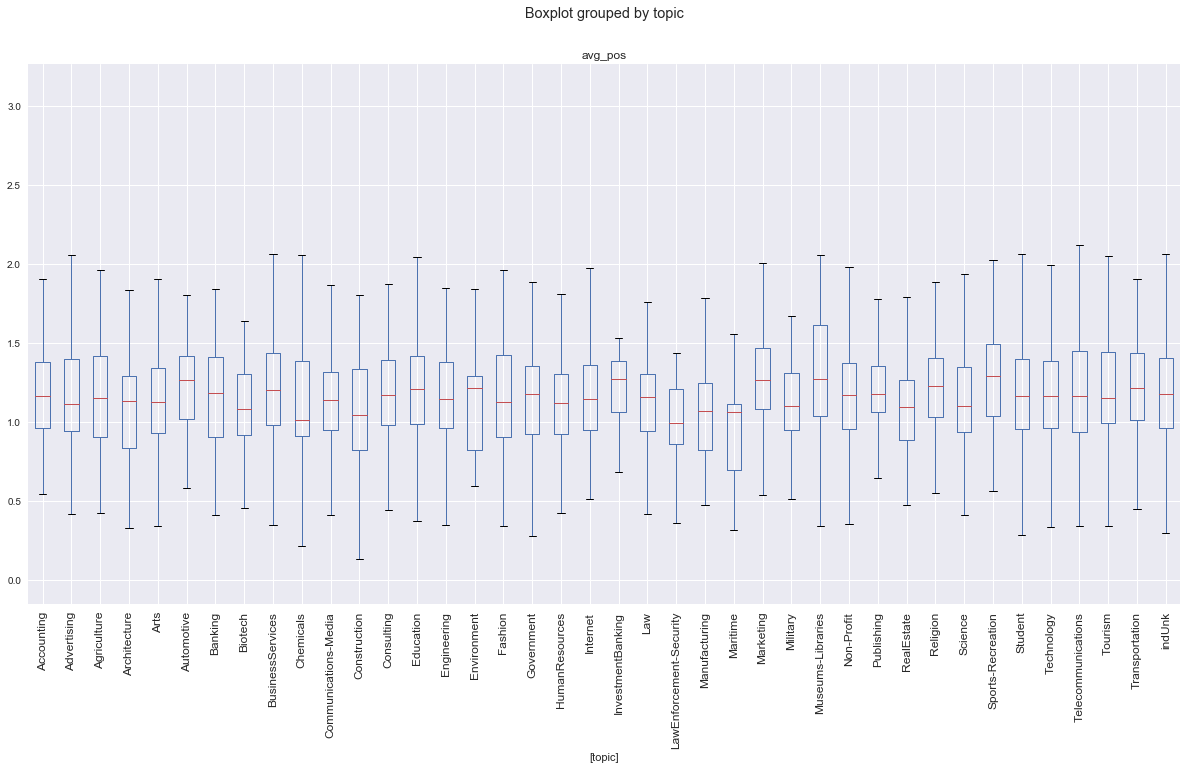

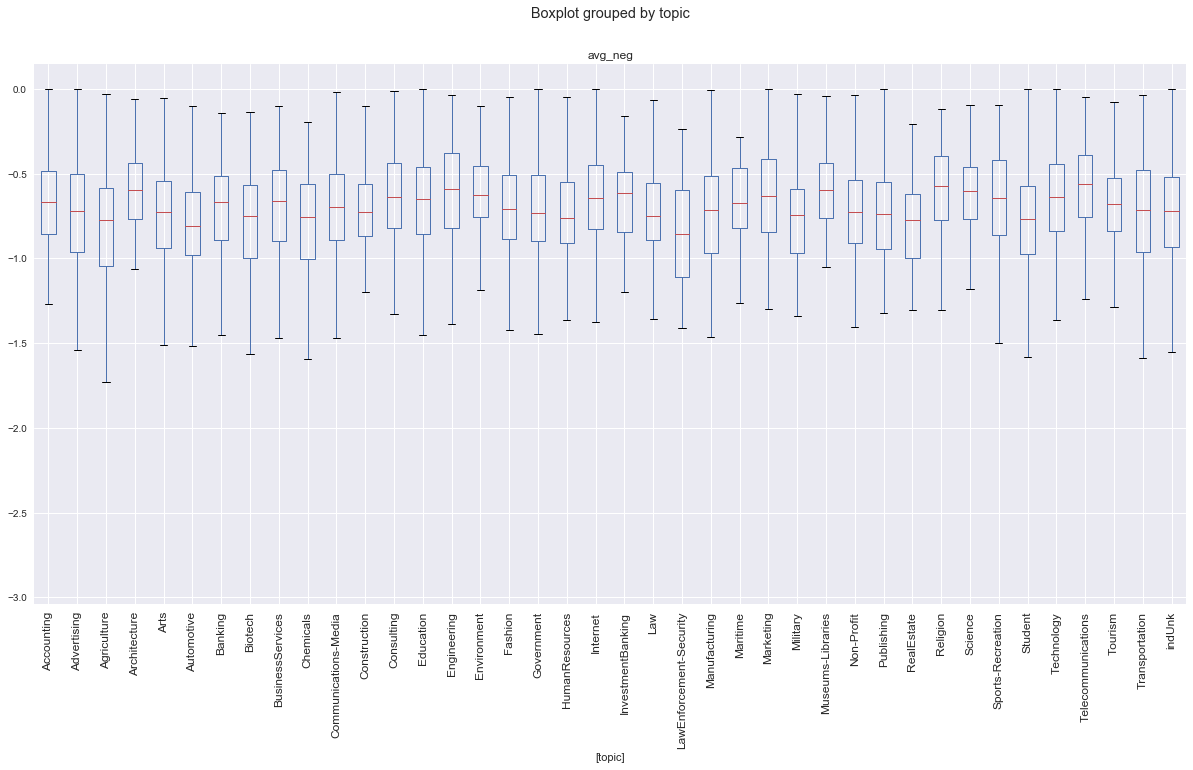

In [174]:
files[['topic','avg_pos']].boxplot(by='topic',figsize=(20,10),rot=90)
files[['topic','avg_neg']].boxplot(by='topic',figsize=(20,10),rot=90)
plt.show()

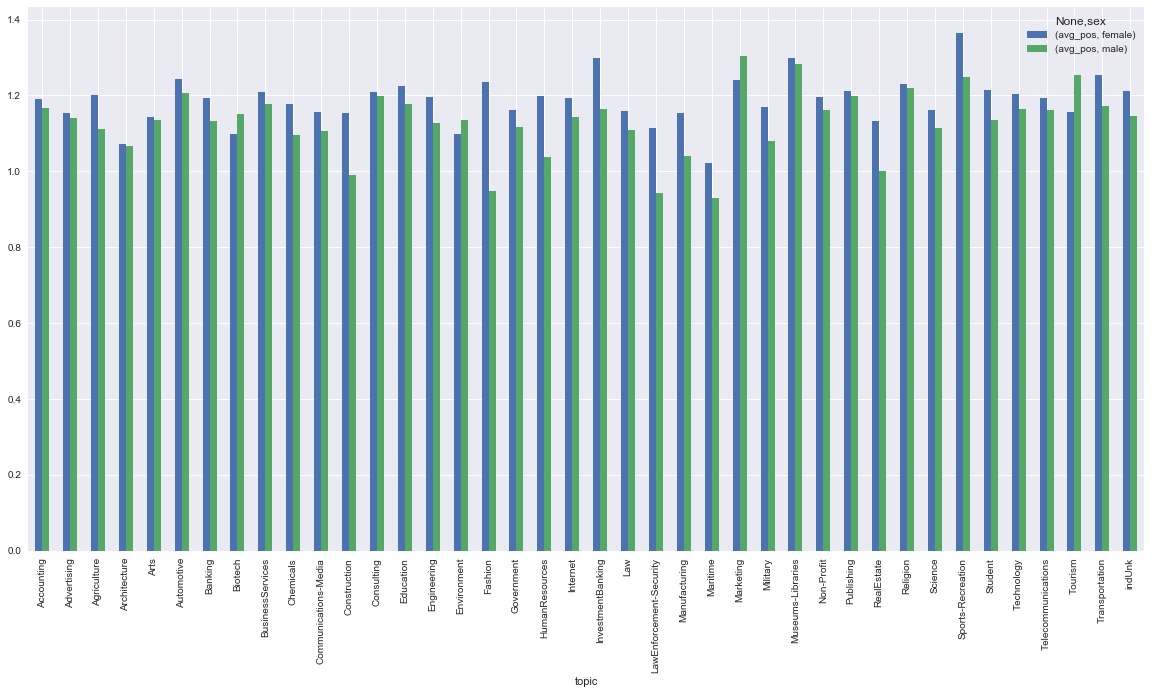

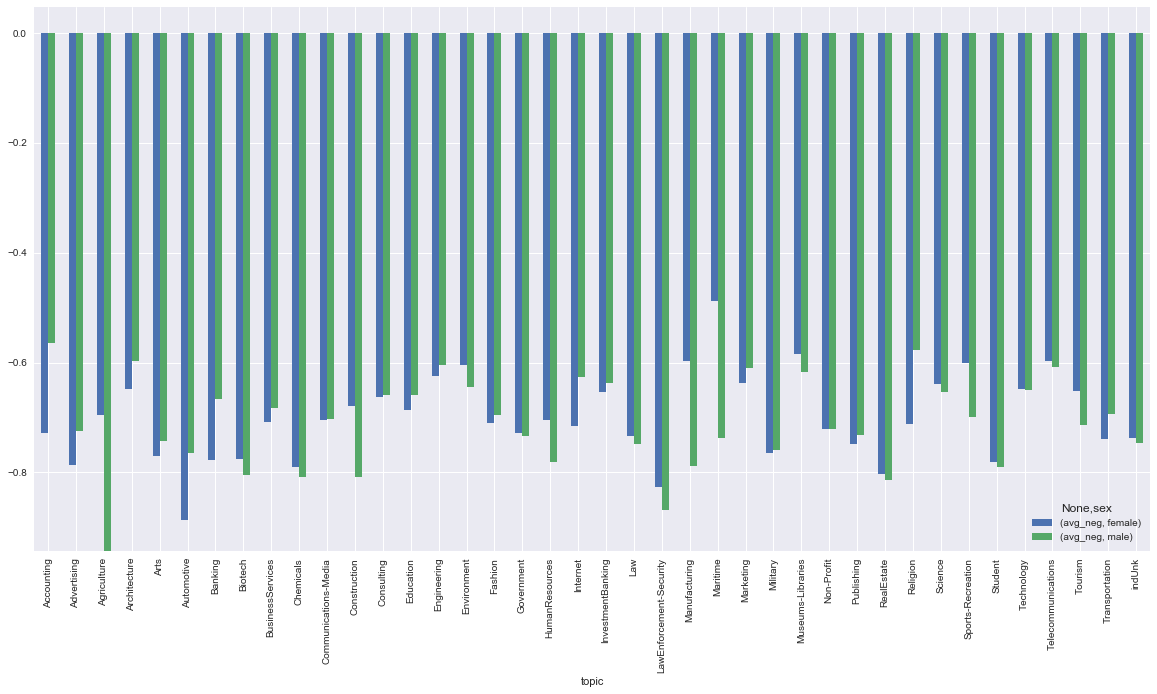

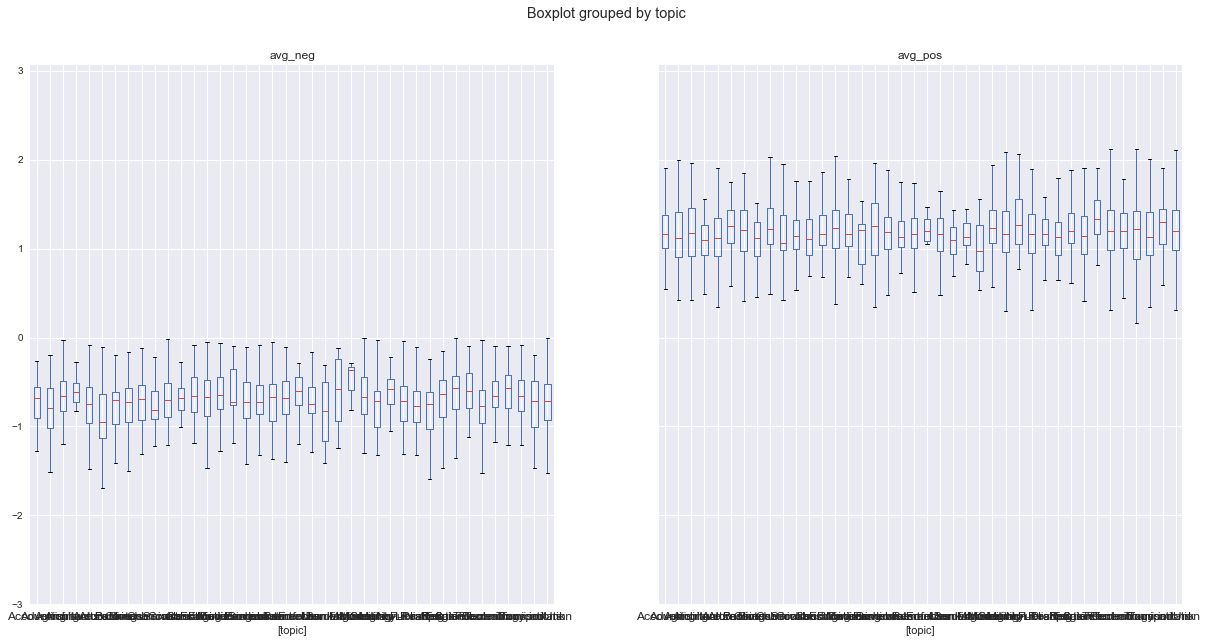

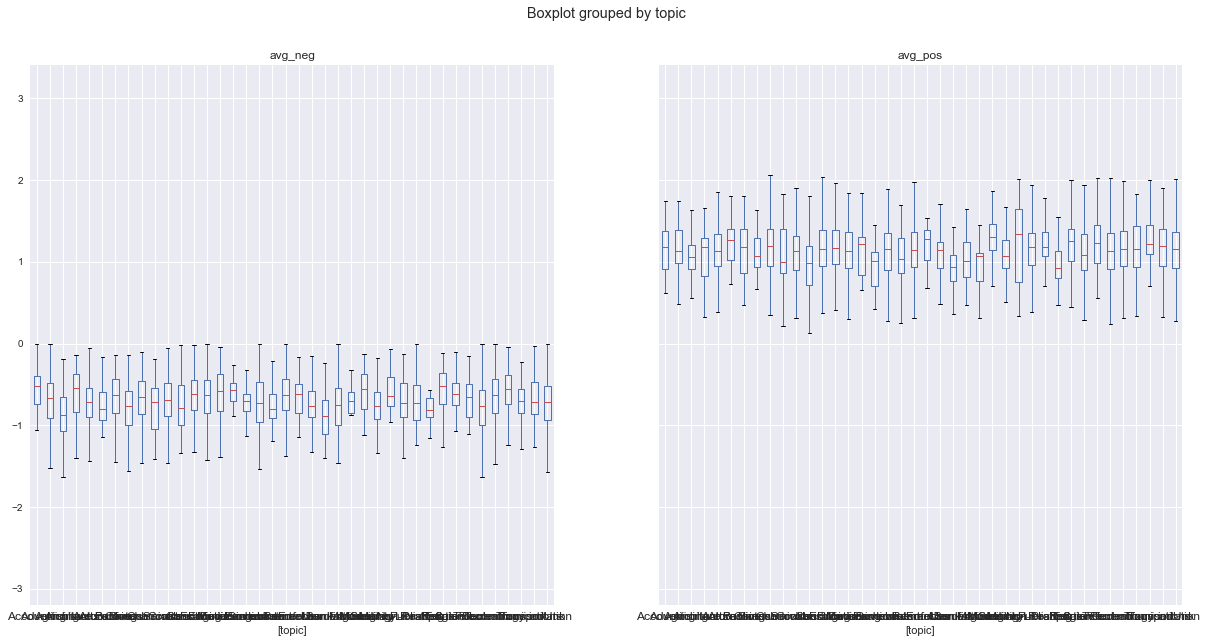

In [124]:
files[['topic','sex','avg_pos']].groupby(['topic','sex']).mean().unstack().plot(kind='bar',figsize=(20,10))
files[['topic','sex','avg_neg']].groupby(['topic','sex']).mean().unstack().plot(kind='bar',figsize=(20,10))
plt.show()

In [176]:
diffP = []
diffN = []
topics = list(files['topic'].unique())
for t in topics :
    
    value = stats.ttest_ind(files[(files['sex'] == 'male') & (files['topic'] == t) & (files['avg_pos'].notnull())]['avg_pos'], 
                files[(files['sex'] == 'female') & (files['topic'] == t) & (files['avg_pos'].notnull())]['avg_pos'])
    if value.pvalue < .05 :
        diffP.append(t)
    print(t)
    print("pos",value.pvalue)
    
        
    value = stats.ttest_ind(files[(files['sex'] == 'male') & (files['topic'] == t) & (files['avg_neg'].notnull())]['avg_neg'], 
                files[(files['sex'] == 'female') & (files['topic'] == t) & (files['avg_neg'].notnull())]['avg_neg'])
    if value.pvalue < .05 :
        diffN.append(t)
    print("neg",value.pvalue)
    print('--------------------------------------')

indUnk
pos 1.55431308884e-11
neg 0.309834027844
--------------------------------------
Student
pos 1.0144466434e-13
neg 0.342318561336
--------------------------------------
Arts
pos 0.786220176437
neg 0.362653812482
--------------------------------------
Engineering
pos 0.247490121923
neg 0.677434583659
--------------------------------------
Religion
pos 0.866511400907
neg 0.0445455198638
--------------------------------------
Architecture
pos 0.977392725104
neg 0.546023506118
--------------------------------------
Technology
pos 0.197517763598
neg 0.930941050161
--------------------------------------
RealEstate
pos 0.209360575092
neg 0.913336000838
--------------------------------------
Publishing
pos 0.847369183658
neg 0.77354723152
--------------------------------------
Communications-Media
pos 0.138498711961
neg 0.949350511768
--------------------------------------
Education
pos 0.0660358143947
neg 0.249475659892
--------------------------------------
Banking
pos 0.383616031559
ne

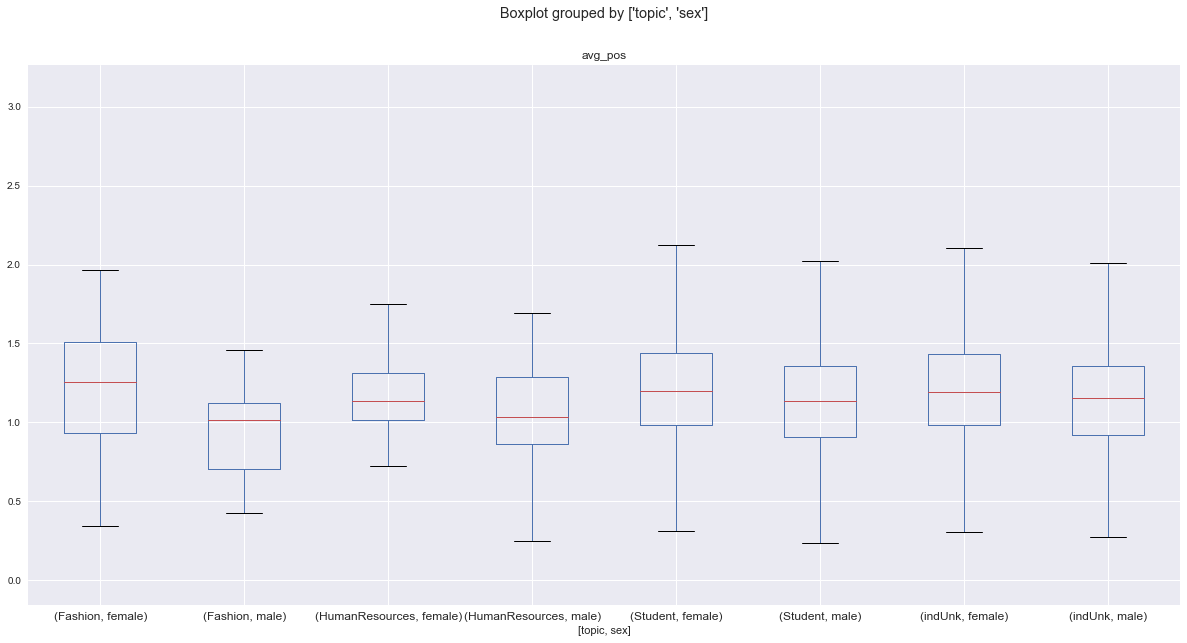

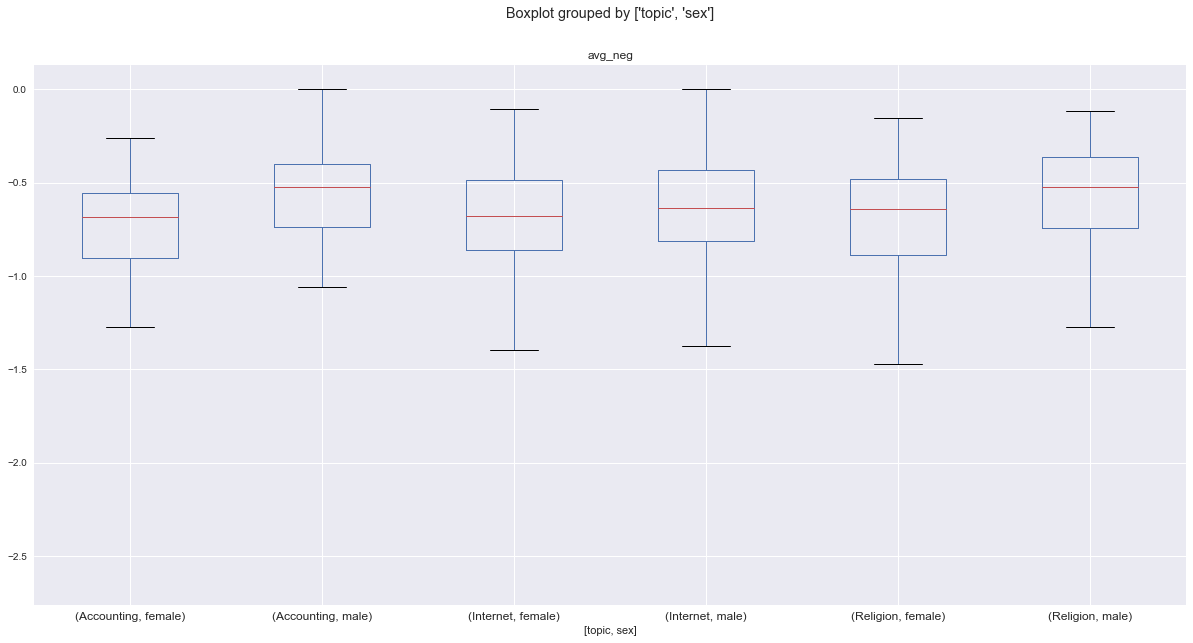

In [178]:
files[files['topic'].isin(diffP)][['topic','avg_pos','sex']].boxplot(by=['topic','sex'],figsize=(20,10))
files[files['topic'].isin(diffN)][['topic','avg_neg','sex']].boxplot(by=['topic','sex'],figsize=(20,10))
plt.show()